## EDA On Titanic Dataset

In [1]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Explore the Dataset

In [2]:
df = pd.read_csv("./Excel/Titanic_Machine_Learning_from_Disaster.csv")
df.drop(columns="Unnamed: 0",inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
df.shape

(891, 15)

In [10]:
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [11]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Perform data cleaning: handle missing values, convert types

In [20]:
# Missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# fill missing values of age which is 177 because removing cause to miss the valuable data
age =df['age'].fillna(df['age'].median()) 
age.astype("int64") # datatype to int
age = df.isnull().sum()
age

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [59]:
# embarked and embark_town have 2 missing values which can be fill or drop,
# it will never affect the dataset in both conditions  
df.dropna(subset=["embarked","embark_town"],inplace=True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [60]:
# non essential data deck
df.drop(columns="deck",inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Cleaned dataset 

In [62]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Convert Datatypes

In [63]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
dtype: object

In [ ]:
# convert dtype 
df["age"] = df['age'].astype(int)
df["fare"] = df['fare'].astype(int)
for c in ['sex',"embarked","class","who","embark_town","alive"]:
    df[c] = df[c].astype("category")
df.dtypes

survived          int64
pclass            int64
sex            category
age               int64
sibsp             int64
parch             int64
fare              int64
embarked       category
class          category
who            category
adult_male         bool
embark_town    category
alive          category
alone              bool
dtype: object

### Summary Statistics

In [6]:
print("Summary Statistics")
df.describe()

Summary Statistics


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Group Based insights(e.g, survival by gender/class))

In [25]:
print(f"The survival rate by sex and class")
gender = df.groupby(["sex","class"])["survived"].mean()
gender


The survival rate by sex and class


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

## Visualization

In [3]:
sns.set_theme(style="whitegrid")

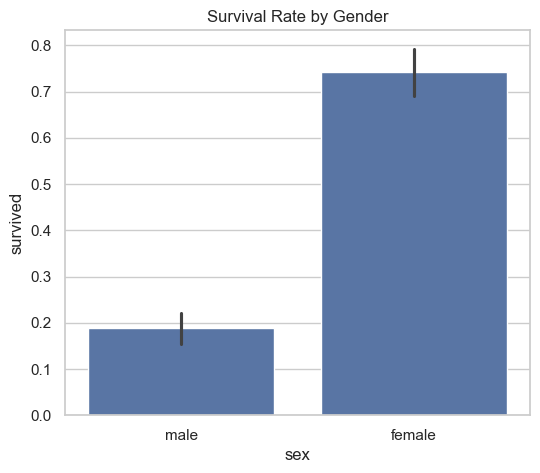

In [9]:
plt.figure(figsize=(6,5))
sns.barplot(x="sex",y="survived",data=df)
plt.title("Survival Rate by Gender")
plt.show()

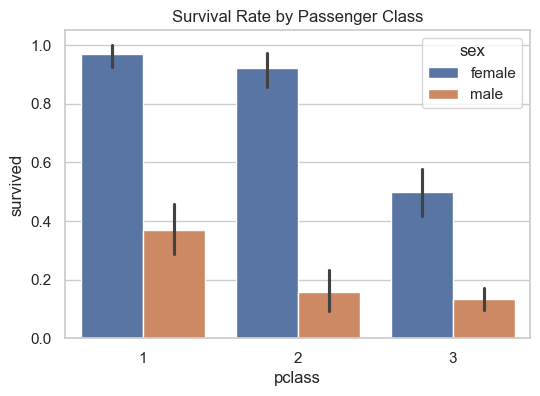

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived',hue="sex", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

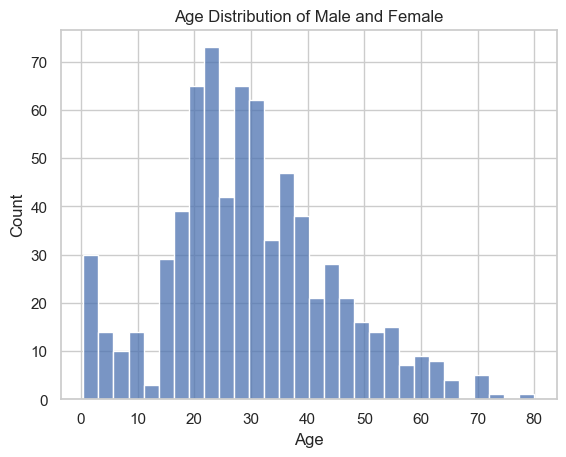

In [72]:
plt.Figure(figsize=(6,6))
sns.histplot(df,x="age",bins=30)
plt.title("Age Distribution of Male and Female")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

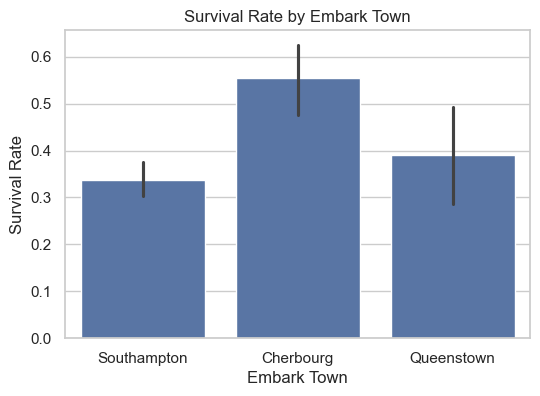

In [74]:
plt.figure(figsize=(6,4))
sns.barplot(x='embark_town', y='survived', data=df)
plt.title('Survival Rate by Embark Town')
plt.ylabel('Survival Rate')
plt.xlabel('Embark Town')
plt.show()


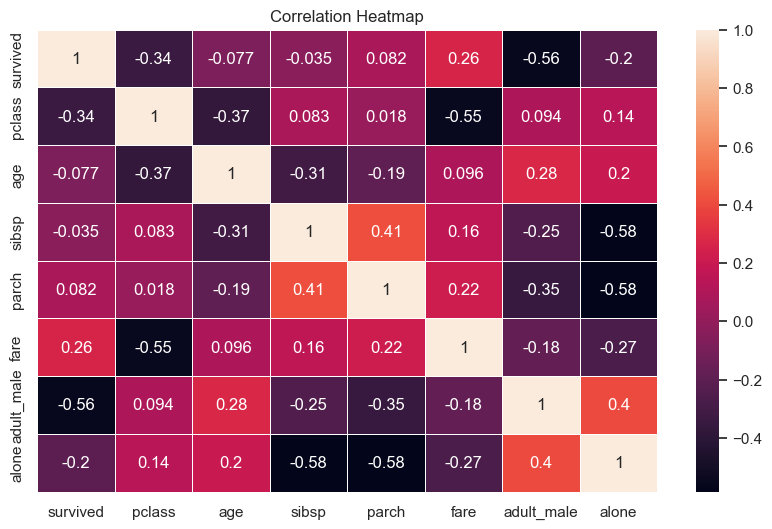

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

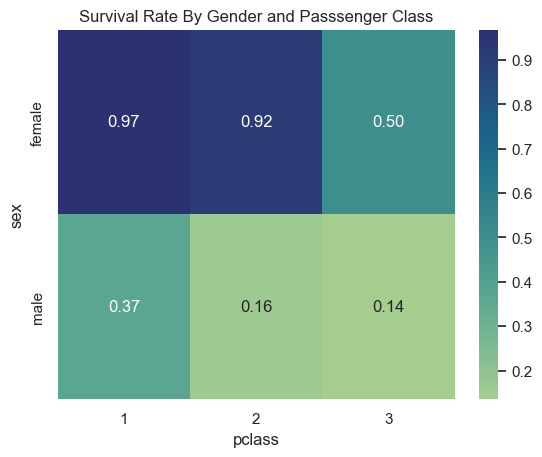

In [76]:
pivot = df.pivot_table(index="sex",columns="pclass",values="survived")
plt.Figure(figsize=(6,4))
sns.heatmap(pivot,annot=True,cmap="crest",fmt=".2f")
plt.title("Survival Rate By Gender and Passsenger Class")
plt.show()